In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Data Sets/drug200.csv")

In [ ]:
dataset.shape

(200, 6)

In [ ]:
from pycaret.datasets import get_data
import pandas as pd

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (190, 6)
Unseen Data For Predictions: (10, 6)


In [ ]:
from pycaret.classification import *
from pycaret.classification import compare_models

In [ ]:
exp_clf102 = setup(data = data, target = 'Drug', session_id=123)

,Description,Value
0,session_id,123
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(190, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9929,1.0000,0.9800,0.9871,0.9897,0.9896,0.9903,0.121
lr,Logistic Regression,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.466
dt,Decision Tree Classifier,0.9923,0.9929,0.9950,0.9934,0.9921,0.9884,0.9892,0.012
rf,Random Forest Classifier,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.488
gbc,Gradient Boosting Classifier,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.286
et,Extra Trees Classifier,0.9181,0.9917,0.8917,0.9069,0.9051,0.8853,0.8925,0.400
ridge,Ridge Classifier,0.9165,0.0000,0.8938,0.9142,0.9073,0.8813,0.8897,0.010
lda,Linear Discriminant Analysis,0.8802,0.9941,0.9076,0.9190,0.8793,0.8367,0.8526,0.012
ada,Ada Boost Classifier,0.8253,0.9559,0.5950,0.7145,0.7591,0.7402,0.7577,0.080
nb,Naive Bayes,0.7593,0.9208,0.8714,0.8752,0.7489,0.6884,0.7306,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9929,1.0000,0.9800,0.9871,0.9897,0.9896,0.9903,0.044
lr,Logistic Regression,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.251
dt,Decision Tree Classifier,0.9923,0.9929,0.9950,0.9934,0.9921,0.9884,0.9892,0.012
rf,Random Forest Classifier,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.452
gbc,Gradient Boosting Classifier,0.9923,1.0000,0.9950,0.9934,0.9921,0.9884,0.9892,0.286
et,Extra Trees Classifier,0.9181,0.9917,0.8917,0.9069,0.9051,0.8853,0.8925,0.400
ridge,Ridge Classifier,0.9165,0.0000,0.8938,0.9142,0.9073,0.8813,0.8897,0.010
lda,Linear Discriminant Analysis,0.8802,0.9941,0.9076,0.9190,0.8793,0.8367,0.8526,0.013
ada,Ada Boost Classifier,0.8253,0.9559,0.5950,0.7145,0.7591,0.7402,0.7577,0.076
nb,Naive Bayes,0.7593,0.9208,0.8714,0.8752,0.7489,0.6884,0.7306,0.013


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                     

In [ ]:
type(top3)

list

In [ ]:
print(top3)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_imp

In [ ]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,0.9667,0.9714,0.9658,0.9623,0.9467,0.9487
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9926,0.9933,0.9943,0.9932,0.9925,0.9893,0.9897
Std,0.0148,0.0133,0.0114,0.0137,0.0151,0.0213,0.0205


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.00,1.0,1.00,1.00,1.00,1.00,1.00
1,1.00,1.0,1.00,1.00,1.00,1.00,1.00
2,0.92,1.0,0.95,0.93,0.92,0.88,0.89
3,1.00,1.0,1.00,1.00,1.00,1.00,1.00
4,1.00,1.0,1.00,1.00,1.00,1.00,1.00
5,1.00,1.0,1.00,1.00,1.00,1.00,1.00
6,1.00,1.0,1.00,1.00,1.00,1.00,1.00
7,1.00,1.0,1.00,1.00,1.00,1.00,1.00
8,1.00,1.0,1.00,1.00,1.00,1.00,1.00


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,6
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf2, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,6
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9286,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9286,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9286,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fract

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [ ]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 37
INFO:logs:master_model_c

In [ ]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 40
INFO:logs:master_model_container: 40
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 41
INFO:logs:master_model_container: 41
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 17
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
print(blender_top3.estimators_)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_imp

In [ ]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 18
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                  

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
2,0.9231,1.0,0.950,0.9341,0.9205,0.8839,0.8922
3,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 44
INFO:logs:master_model_container: 44
INFO:logs:display_container: 19
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


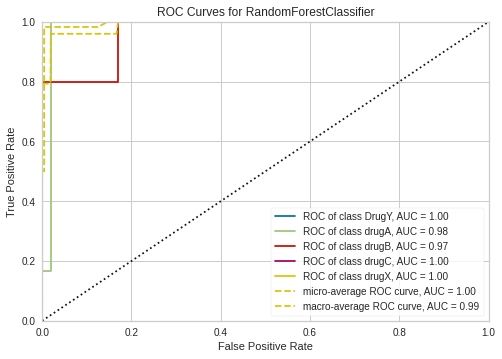

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot='auc')

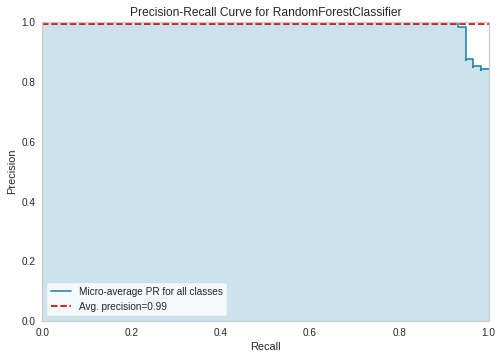

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'pr')

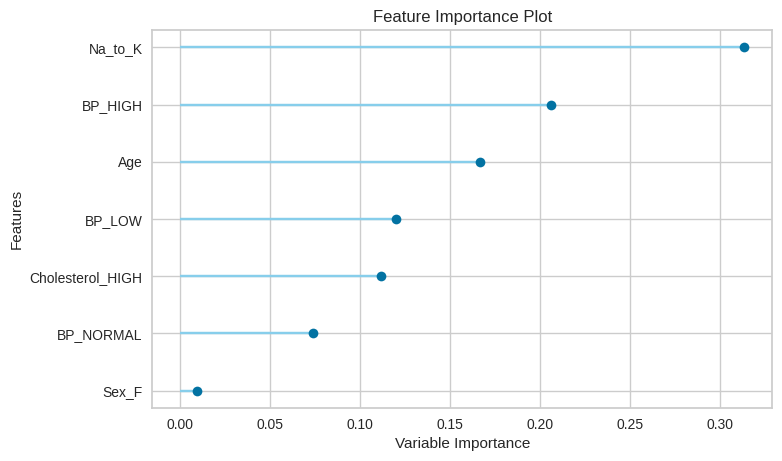

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
from pycaret.utils import check_metric 
check_metric(new_prediction['Drug'], new_prediction['Label'], metric = 'Accuracy')

1.0

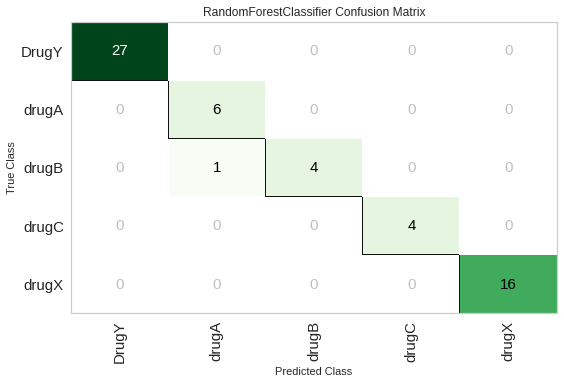

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9828,0.9967,0.96,0.9852,0.9825,0.9748,0.9752


In [ ]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                  

In [ ]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
predict_model(final_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0,0,0,0,0,0


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,57,M,LOW,NORMAL,19.128,DrugY,DrugY,0.8447
1,18,F,NORMAL,NORMAL,8.750,drugX,drugX,0.8968
2,60,F,HIGH,HIGH,13.303,drugB,drugB,0.7362
3,64,M,NORMAL,HIGH,7.761,drugX,drugX,0.7407
4,69,M,LOW,HIGH,15.478,DrugY,DrugY,0.8074


In [ ]:
save_model(final_rf,'Final_Intermediate_Classification_Sep8')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), model_name=Final_Intermediate_Classification_Sep8, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Drug',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

In [ ]:
saved_final_rf = load_model('Final_Intermediate_Classification_Sep8')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_Intermediate_Classification_Sep8, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0,0,0,0,0,0


In [ ]:
new_prediction.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,57,M,LOW,NORMAL,19.128,DrugY,DrugY,0.8447
1,18,F,NORMAL,NORMAL,8.750,drugX,drugX,0.8968
2,60,F,HIGH,HIGH,13.303,drugB,drugB,0.7362
3,64,M,NORMAL,HIGH,7.761,drugX,drugX,0.7407
4,69,M,LOW,HIGH,15.478,DrugY,DrugY,0.8074
